# Introduction

This project focuses on analyzing Instacart's dataset to gain insights into customer ordering behavior. The primary goal is to clean, explore, and visualize data to identify patterns, trends, and actionable insights that could inform business decisions.

### Datasets Utilized
- **Orders**: Captures customer order details, such as the day of the week and time of purchase.
- **Products**: Contains information about the items available for purchase.
- **Aisles and Departments**: Classify products into categories for better understanding.
- **Order Products**: Details the products ordered in each transaction.

### Approach
The analysis involves:
1. **Data Cleaning**: Handling duplicates and missing values to ensure data integrity.
2. **Exploratory Data Analysis (EDA)**: Identifying patterns and trends in the data.
3. **Visualization**: Creating graphs and charts to highlight key findings.

### Tools
This project utilizes Python libraries, including:
- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib` for data visualization

In [1]:
# import pandas library
import pandas as pd

In [2]:
# import numpy libary
import numpy as np

In [3]:
# import matplotlib for graphing
import matplotlib.pyplot as plt

**1 Instacart Orders Data**

**instacart_orders.csv: each row corresponds to one order on the Instacart app**

- **order_id**: ID number that uniquely identifies each order
- **user_id**: ID number that uniquely identifies each customer account
- **order_number**: the number of times this customer has placed an order
- **order_dow**: day of the week that the order placed (which day is 0 is uncertain)
- **order_hour_of_day**: hour of the day that the order was placed
- **days_since_prior_order**: number of days since this customer placed their previous order

In [4]:
# import csv
df_instacart_orders = pd.read_csv("/datasets/instacart_orders.csv",sep=';')
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


**2 Products Data**

**products.csv:** each row corresponds to a unique product that customers can buy

- **'product_id'**: ID number that uniquely identifies each product
- **'product_name'**: name of the product
- **'aisle_id'**: ID number that uniquely identifies each grocery aisle category
- **'department_id'**: ID number that uniquely identifies each grocery department category

In [5]:
# import csv
df_products = pd.read_csv("/datasets/products.csv",sep=';')
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


**3 Aisles Data**

**aisles.csv**

- **'aisle_id'**: ID number that uniquely identifies each grocery aisle category
- **'aisle'**: name of the aisle

In [6]:
# import csv
df_aisles = pd.read_csv("/datasets/aisles.csv",sep=';')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


**4 Departments Data**

**departments.csv**

- **'department_id'**: ID number that uniquely identifies each grocery department category
- **'department'**: name of the department

In [7]:
# import csv
df_departments = pd.read_csv("/datasets/departments.csv",sep=";")
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


**5 Order Products Data**

**order_products.csv**: each row corresponds to one item placed in an order

- **'order_id'**: ID number that uniquely identifies each order
- **'product_id'**: ID number that uniquely identifies each product
- **'add_to_cart_order'**: the sequential order in which each item was placed in the cart
- **'reordered'**: 0 if the customer has never ordered this product before, 1 if they have

In [8]:
# import csv
df_order_products = pd.read_csv("/datasets/order_products.csv",sep=';')
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [9]:
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [10]:
# Check for duplicated orders
dups = df_instacart_orders.duplicated().sum()
print(f"There are {dups} duplicates")

There are 15 duplicates


In [11]:
print(f'Here are the {dups} rows')
df_instacart_orders[df_instacart_orders.duplicated()]

Here are the 15 rows


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


---
# Summary For Instacart Dataframe
#### Column Names
- **Observation**: Column names are self-explanatory.
- **Action**: No renaming is necessary.

#### Data Types
- **Orders DataFrame**: 
  - Most columns are of type `int64`, except for `days_since_prior_order`, which is `float64`.
  - The `order_dow` (day of the week) and `order_hour_of_day` columns contain numerical data.
- **Action**: Data types are appropriate.

#### Missing Values
- **Orders DataFrame**:
  - `days_since_prior_order`: Contains some missing values, which may indicate a customer's first order.
  - Other columns have no missing values.
- **Action**: Missing values in `days_since_prior_order` will be addressed later.

#### Duplicate Values
- **Orders DataFrame**:
  - Identified 15 duplicate rows.
  - These duplicates were found to occur on the same day and at the same time, suggesting possible redundant entries.
- **Action**: These duplicates will be handled later in the analysis.

#### Summary
By examining the dataset's structure and content, the data aligns with expectations for this project. Identified issues, such as missing and duplicate values, have been documented and will be handled during the data cleaning process.

---

In [12]:
# Check for all orders placed Wednesday at 2:00 AM

In [13]:
df_instacart_orders['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

We can assume 0=sunday, 1=monday,...,6=saturday because 0 means to start and the day of the week starts sundays.

In [14]:
# Make a new column of the days of the week
day_of_week = {0:'sunday',
               1:'monday',
               2:'tuesday',
               3:'wednesday',
               4:'thursday',
               5:'friday',
               6:'saturday'}

df_instacart_orders['day_of_week'] = df_instacart_orders['order_dow'].replace(day_of_week)
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [15]:
hours = sorted([i for i in df_instacart_orders['order_hour_of_day'].unique()])
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [16]:
# orders placed at wednesy at 2:00 am
orders_wed_2am = df_instacart_orders.query("day_of_week == 'wednesday' & order_hour_of_day == 2")
orders_wed_2am.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
4838,2766110,162084,41,3,2,16.0,wednesday
5156,2190225,138285,18,3,2,11.0,wednesday
15506,553049,58599,13,3,2,7.0,wednesday
18420,382357,120200,19,3,2,11.0,wednesday
24691,690242,77357,2,3,2,9.0,wednesday


In [17]:
# Remove duplicate orders
df_instacart_orders = df_instacart_orders.drop_duplicates().reset_index(drop=True)
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [18]:
# Double check for duplicate rows
dups = df_instacart_orders.duplicated().sum()
print(f"There are {dups} duplicates")

There are 0 duplicates


In [19]:
# Double check for duplicate order IDs only
df_instacart_orders.shape

(478952, 7)

In [20]:
df_instacart_orders['order_id'].nunique()

478952

Since number of rows match the number of unique rows for the order Id column, there is no duplicates order Id numbers.

In [21]:
# Convert columns to correct data types
df_instacart_orders['day_of_week'] = df_instacart_orders['day_of_week'].astype('category')

___
# Summary for Orders Data Frame

The `orders` data frame provides details about customer transactions, including order timing and frequency. Observations include:
- **Duplicate Rows**: Identified 15 duplicate rows, all occurring on the same day and time. These were removed.
- **Missing Values**: The `days_since_prior_order` column had some missing values, likely representing customers’ first orders. These were left as is it is..
- **Data Types**: The `order_dow` and `order_hour_of_day` columns contain numerical data that fall within expected ranges (0-6 for days and 0-23 for hours). The `day_of_week` column was converted to a categorical type for optimized processing.
___

### `products` data frame

In [22]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
# Check for fully duplicate rows
dups = df_products.duplicated().sum()
print(f"There are {dups} full duplicated rows.")

There are 0 full duplicated rows.


In [24]:
# Check for just duplicate product IDs
df_products.shape

(49694, 4)

In [25]:
df_products['product_id'].nunique()

49694

The number of rows equal the number of unique values for the product id column, so no full duplicates in this columns

In [26]:
# Check for just duplicate product names (convert names to lowercase to compare better)
def normalize_lower(col):
    if pd.isna(col):
        return col
    else:
        return col.lower()

In [27]:
df_products["product_name_lower"] = df_products["product_name"].apply(normalize_lower)
df_products.head()

,product_id,product_name,aisle_id,department_id,product_name_lower
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce


In [28]:
# Check if there are duplicates in the product name lower column
product_lower = df_products['product_name_lower'].value_counts(ascending = False)
product_lower[product_lower>1]

green tea with ginseng and honey                   3
organic instant oatmeal light maple brown sugar    2
biotin 1000 mcg                                    2
solid white albacore tuna in spring water          2
organic balsamic vinegar of modena                 2
                                                  ..
sea salt caramel ice cream                         2
tomato and basil pasta sauce                       2
albacore solid white tuna in water                 2
half and half                                      2
solid white albacore tuna in water                 2
Name: product_name_lower, Length: 103, dtype: int64

In [29]:
# Count how many duplicate product names exist among non-missing names
dups = df_products[df_products['product_name_lower'].notna()]['product_name_lower'].duplicated().sum()
print(f"There are {dups} duplicated product names among non-missing entries")

duplicate_names = df_products[df_products['product_name_lower'].notna()]['product_name_lower'].value_counts()[lambda x: x > 1]
print(f"Duplicate product names:\n{duplicate_names}")

There are 104 duplicated product names among non-missing entries
Duplicate product names:
green tea with ginseng and honey                   3
organic instant oatmeal light maple brown sugar    2
biotin 1000 mcg                                    2
solid white albacore tuna in spring water          2
organic balsamic vinegar of modena                 2
                                                  ..
sea salt caramel ice cream                         2
tomato and basil pasta sauce                       2
albacore solid white tuna in water                 2
half and half                                      2
solid white albacore tuna in water                 2
Name: product_name_lower, Length: 103, dtype: int64


In [30]:
# Check for duplicate product names that aren't missing
df_products[df_products['product_name_lower'].notna()].duplicated().sum()

0

In [31]:
# Define a normalization function for stricter cleaning
def normalize_other(col):
    '''This function will apply stricter normalization conditions'''
    if pd.isna(col):
        return col
    else:
        col = col.lower()  # Convert to lowercase
        col = col.strip()  # Remove leading/trailing whitespace
        col = " ".join(col.split())  # Remove extra spaces between words
        col = col.replace('-', '')  # Remove hyphens
        col = col.replace(' ', '')  # Remove all spaces
        return col

# Apply the normalization to create a stricter product name column
df_products["product_name_lower_2"] = df_products["product_name_lower"].apply(normalize_other)

# Check for duplicates in non-missing, normalized product names
non_missing = df_products[df_products["product_name_lower_2"].notna()]
duplicate_count = non_missing.duplicated(subset=["aisle_id", "department_id", "product_name_lower_2"]).sum()

print(f"There are {duplicate_count} more duplicated rows based on stricter normalization.")

# Optional: Print duplicate names for verification
duplicates = non_missing[non_missing.duplicated(subset=["aisle_id", "department_id", "product_name_lower_2"], keep=False)]
print("Duplicated rows based on stricter normalization:")
print(duplicates)

There are 343 more duplicated rows based on stricter normalization.
Duplicated rows based on stricter normalization:
       product_id                                     product_name  aisle_id  \
41             42                                  Biotin 1000 mcg        47   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
279           280              Makeup Remover Cleansing Towelettes        73   
498           499                                   Aspirin 325 Mg       133   
515           516                           American Cheese Slices        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
496

In [32]:
# Ensure df_products retains all columns
df_products = df_products[["product_id", "product_name", "aisle_id", "department_id", "product_name_lower", "product_name_lower_2"]]


df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            49694 non-null  int64 
 1   product_name          48436 non-null  object
 2   aisle_id              49694 non-null  int64 
 3   department_id         49694 non-null  int64 
 4   product_name_lower    48436 non-null  object
 5   product_name_lower_2  48436 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


# Section Summary of `df_products` DataFrame

In this section, the `df_products` dataframe retains all necessary columns after cleaning and processing. Steps included:

1. **Preserving Original and Derived Columns**:
   - Columns like `product_id`, `product_name`, `aisle_id`, and `department_id` from the original dataframe were retained.
   - New columns such as `product_name_lower` and `product_name_lower_2` (used for normalized product names) were kept.

2. **Validation of Dataframe Structure**:
   - Using `.info()` confirmed the presence of all expected columns:
     - `product_id` (unique identifier for each product).
     - `product_name` (original product names).
     - `aisle_id` and `department_id` (categorization of products).
     - `product_name_lower` and `product_name_lower_2` (processed product names for duplicate detection).

### `departments` data frame

In [33]:
df_departments['department'] = df_departments['department'].astype('category')

In [34]:
df_departments.duplicated().sum()

0

In [35]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   department_id  21 non-null     int64   
 1   department     21 non-null     category
dtypes: category(1), int64(1)
memory usage: 1.0 KB


---
# Section Summary For Departments Dataframe

The `departments` dataframe was analyzed to make sure the clean by checking for duplicate rows. This includes:
- **Duplicate Rows**: No duplicate rows were found in the dataframe (`0 duplicates`).
- **Data Structure**: The dataframe consists of 21 unique department entries and no missing values in the `department_id` or `department` columns.
---

### `aisles` data frame

In [36]:
df_aisles['aisle'] = df_aisles['aisle'].astype('category')

In [37]:
# Check for duplicates
df_aisles['aisle'].duplicated().sum()
df_aisles.duplicated().sum()

0

In [38]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   aisle_id  134 non-null    int64   
 1   aisle     134 non-null    category
dtypes: category(1), int64(1)
memory usage: 6.6 KB


# Section Summary For Aisles Dataframe

The `aisles` dataframe was analyzed to make sure there are no duplicate rows and that the data is clean and ready for analysis. Key points included:

1. **Duplicate Rows**:
   - No duplicate rows were found in the dataframe (`0 duplicates`).
   - Both the `aisle_id` and `aisle` columns are unique.

2. **Data Structure**:
   - The dataframe had 134 unique entries with no missing values in the `aisle_id` or `aisle` columns.
   - The `aisle` column was converted to the `category` data type to optimize storage and speed.

### `order_products` data frame

In [39]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [40]:
# Check for fullly duplicate rows
dups = df_order_products.duplicated().sum()
print(f"The are {dups} fully duplicated rows")

The are 0 fully duplicated rows


In [41]:
# Double check for any other tricky duplicates
duplicate_combinations = df_order_products.duplicated(subset=["order_id", "product_id"]).sum()
print(f"There are {duplicate_combinations} duplicate combinations of order_id and product_id.")

There are 0 duplicate combinations of order_id and product_id.


In [42]:
df_order_products.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


# Section Summary For Order-Products Dataframe

The `order_products` dataframe was analyzed for duplicates to make sure data is clean.

1. **Fully Duplicated Rows**:
   - No fully duplicated rows were found (`0 fully duplicated rows`).

2. **Duplicate Combinations of `order_id` and `product_id`**:
   - No duplicate combinations of `order_id` and `product_id` were found (`0 duplicate combinations`).
   - This confirms that each product is uniquely associated with an order.

3. **Data Structure**:
   - The dataframe contains 4,545,007 entries with the following columns:
     - `order_id`: Unique identifier for each order.
     - `product_id`: Unique identifier for each product in an order.
     - `add_to_cart_order`: Position of the product in the cart.
     - `reordered`: Indicator of whether the product was previously ordered.

## Find and remove missing values


### `products` data frame

In [43]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            49694 non-null  int64 
 1   product_name          48436 non-null  object
 2   aisle_id              49694 non-null  int64 
 3   department_id         49694 non-null  int64 
 4   product_name_lower    48436 non-null  object
 5   product_name_lower_2  48436 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


In [44]:
df_products.isna().sum()

product_id                 0
product_name            1258
aisle_id                   0
department_id              0
product_name_lower      1258
product_name_lower_2    1258
dtype: int64

In [45]:
# Are all of the missing product names associated with aisle ID 100?
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id,product_name_lower,product_name_lower_2
37,38,NaN,100,21,NaN,NaN
71,72,NaN,100,21,NaN,NaN
109,110,NaN,100,21,NaN,NaN
296,297,NaN,100,21,NaN,NaN
416,417,NaN,100,21,NaN,NaN
...,...,...,...,...,...,...
49552,49553,NaN,100,21,NaN,NaN
49574,49575,NaN,100,21,NaN,NaN
49640,49641,NaN,100,21,NaN,NaN
49663,49664,NaN,100,21,NaN,NaN


In [46]:
df_products[df_products['product_name'].isna()]['aisle_id'].value_counts()

100    1258
Name: aisle_id, dtype: int64

All of the missing product names are associated with aisle ID 100

In [47]:
# Are all of the missing product names associated with department ID 21?
df_products[df_products['product_name'].isna()]['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

All of the missing product names are associated with department 21

In [48]:
# What is this ailse and department?
df_aisles.query('aisle_id == 100')

,aisle_id,aisle
99,100,missing


In [49]:
df_departments.query('department_id==21')

,department_id,department
20,21,missing


The aisle and department is missing

In [50]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

In [51]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            49694 non-null  int64 
 1   product_name          49694 non-null  object
 2   aisle_id              49694 non-null  int64 
 3   department_id         49694 non-null  int64 
 4   product_name_lower    48436 non-null  object
 5   product_name_lower_2  48436 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.3+ MB


# Section Summary: Missing Value Handling for Products Dataframe

The `products` dataframe was analyzed for missing values. Key points and actions include:

1. **Missing Values**:
   - A total of 1,258 rows had missing `product_name` values.
   - All missing rows were associated with:
     - `aisle_id = 100` (identified as "missing" in the aisles dataframe).
     - `department_id = 21` (identified as "missing" in the departments dataframe).

2. **Action Taken**:
   - Missing `product_name` values were replaced with `"Unknown"`.
3. **Final Validation**:
   - Verified that there are no remaining missing values in the dataframe.

### `orders` data frame

In [52]:
print("Missing values in each column:")
print(df_instacart_orders.isna().sum())


missing_days = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]
print("Rows with missing 'days_since_prior_order':")
missing_days

Missing values in each column:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
day_of_week                   0
dtype: int64
Rows with missing 'days_since_prior_order':


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
28,133707,182261,1,3,10,NaN,wednesday
96,787445,25685,1,6,18,NaN,saturday
100,294410,111449,1,0,19,NaN,sunday
103,2869915,123958,1,4,16,NaN,thursday
104,2521921,42286,1,3,18,NaN,wednesday
...,...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN,sunday
478881,2222353,141211,1,2,13,NaN,tuesday
478907,2272807,204154,1,1,15,NaN,monday
478911,2499542,68810,1,4,19,NaN,thursday


In [53]:
# Are there any missing values where it's not a customer's first order?
print("Checking missing values where it is not a customer 1st order")
df_instacart_orders.query("order_number != 1").isna().sum()

Checking missing values where it is not a customer 1st order


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
day_of_week               0
dtype: int64

In [54]:
#missing values where it is a  customer's first order
print("Checking missing values where it is a customer 1st order")
df_instacart_orders.query("order_number == 1").isna().sum()

Checking missing values where it is a customer 1st order


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
day_of_week                   0
dtype: int64

# Section Summary:  Missing Values Handling For Instacart Orders Dataframe

The `orders` dataframe was analyzed to investigate missing values in the `days_since_prior_order` column. The results of the analysis shows:

1. **Non-First Orders (`order_number != 1`)**:
   - There are no missing values in the `days_since_prior_order` column for non-first orders.
2. **First Orders (`order_number == 1`)**:
   - All rows for first orders have missing values in the `days_since_prior_order` column. This is expected behavior because first orders do not have prior days.

**Conclusion**:
- The missing values in the `days_since_prior_order` column are consistent.
- No  action was required to address these missing values because if replace with -1, that would affect the statisics.

### `order_products` data frame

In [55]:
df_order_products.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [56]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [57]:
# What are the min and max values in this column?
col = "add_to_cart_order"
min1 = df_order_products['add_to_cart_order'].min()
max1 = df_order_products['add_to_cart_order'].max()
print(f"The min value for the {col} column is {min1}.)")
print(f"The max value for the {col} column is {max1}.)")

The min value for the add_to_cart_order column is 1.0.)
The max value for the add_to_cart_order column is 64.0.)


In [58]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_ids = list(df_order_products.query("@pd.isna(add_to_cart_order)")['order_id'].unique())
df = df_order_products.query("order_id in @order_ids")
df.head()

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0


In [59]:
df.query("@pd.isna(add_to_cart_order)")

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [60]:
df.query("add_to_cart_order==64")

,order_id,product_id,add_to_cart_order,reordered
76044,1386261,31847,64.0,0
154176,854647,22922,64.0,0
177733,3383594,7970,64.0,0
213282,2470674,30257,64.0,0
233518,1968313,495,64.0,1
...,...,...,...,...
4148751,2999801,24722,64.0,1
4235552,3308010,3888,64.0,1
4409436,747668,31268,64.0,0
4419785,1633337,34,64.0,0


In [61]:
# Do all orders with missing values have more than 64 products?
df.groupby('order_id').count()

,product_id,add_to_cart_order,reordered
order_id,,,
9310,65,64,65
61355,127,64,127
102236,95,64,95
129627,69,64,69
165801,70,64,70
...,...,...,...
2999801,70,64,70
3125735,86,64,86
3308010,115,64,115


In [62]:
df.groupby('order_id').size()

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

In [63]:
order_sizes = df.groupby('order_id').size()
min_size = order_sizes.min()

print(f"The minimum size of orders is {min_size}.")
print("All orders with missing values contain more than 64 items.")

The minimum size of orders is 65.
All orders with missing values contain more than 64 items.


In [64]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


---
# Section Summary: Missing Values Handling For Order Products Dataframe

### Overview
The `order_products` dataframe was analyzed to handle missing values in the `add_to_cart_order` column. The column was checked for missing values.



### Steps Taken

1. **Basic Exploration**
   - **Min and Max Values:**
     - The minimum value of the `add_to_cart_order` column: **1.0**.
     - The maximum value of the `add_to_cart_order` column: **64.0**.

2. **Identifying Missing Values**
   - Missing values in `add_to_cart_order` were identified using `pd.isna()`. 
   - **Number of rows with missing values:** **836 rows**.

3. **Special Case Check**
   - Verified all orders with missing values to confirm that they contain more than **64 items**.

4. **Handling Missing Values**
   - Replaced missing values in the `add_to_cart_order` column with `999`.
   - Converted the column to an integer type for consistent data handling.

5. **Validation**
   - Verified that all missing values were replaced and the column type.

---

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [65]:
order_hour_of_day = sorted(list(df_instacart_orders['order_hour_of_day'].unique()))
order_hour_of_day

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [66]:
order_dow = sorted(list(df_instacart_orders['order_dow'].unique()))
order_dow

[0, 1, 2, 3, 4, 5, 6]

### [A2] What time of day do people shop for groceries?

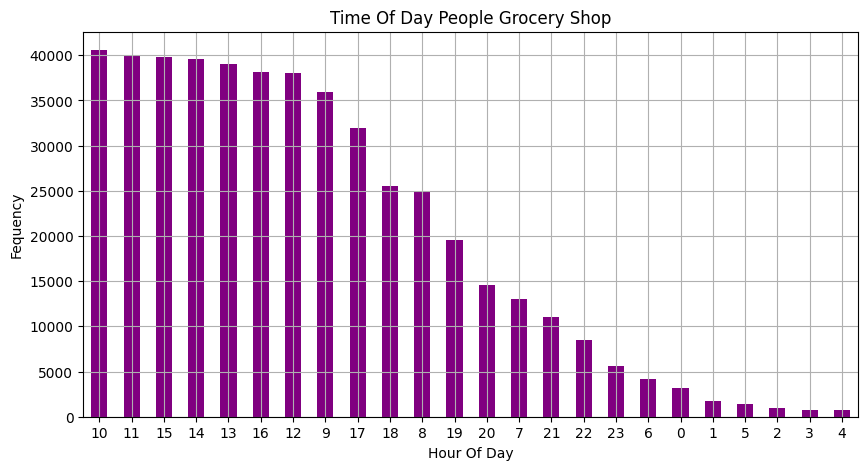

In [67]:
df_instacart_orders["order_hour_of_day"].value_counts().plot(kind="bar",
                                                             rot=0,
                                                             xlabel="Hour Of Day",
                                                             ylabel="Fequency",
                                                             title="Time Of Day People Grocery Shop",
                                                             figsize=[10,5],
                                                             grid=True,
                                                             color='purple')
plt.show()

# The bar chart indicates that the most popular time for grocery shopping is between 10 a.m and 4 p.m. Shopping frequency decreases in the evening and early morning hours, with the lowest activity observed between 1 a.m. and 6 a.m. This suggests that the majority of people prefer shopping during late mornings and early afternoons.

### [A3] What day of the week do people shop for groceries?

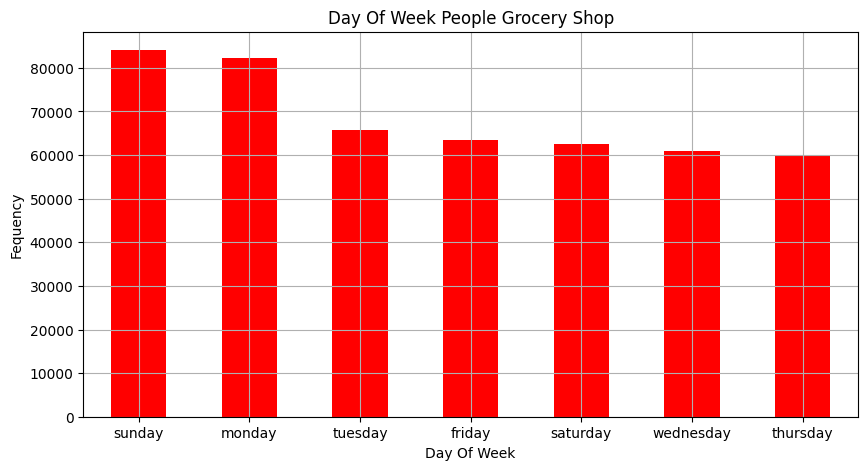

In [68]:
df_instacart_orders["day_of_week"].value_counts().plot(kind="bar",
                                                             rot=0,
                                                             xlabel="Day Of Week",
                                                             ylabel="Fequency",
                                                             title="Day Of Week People Grocery Shop",
                                                             figsize=[10,5],
                                                             grid=True,
                                                             color='red')
plt.show()

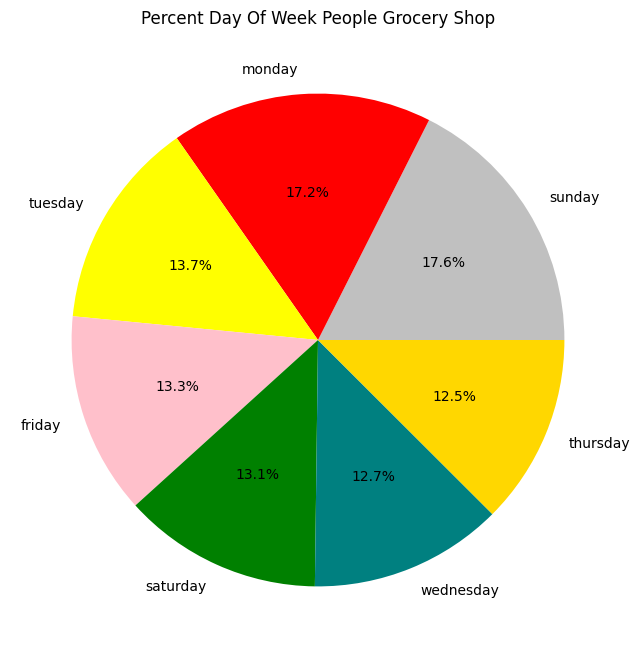

In [69]:
df_instacart_orders["day_of_week"].value_counts().plot(kind="pie",
                                                       autopct="%1.1f%%",
                                                       figsize=[70,8],
                                                       title="Percent Day Of Week People Grocery Shop",
                                                       ylabel='',
                                                       colors=['silver','red','yellow','pink','green','teal','gold'])
                                                       

plt.show()

# Conclusion for Weekly Shopping Patterns

# The bar chart and pie chart shows that most grocery shopping happens on Sunday (17.6%) and Monday (17.2%), making them the most popular days. The remaining days are relatively consistent, with Thursday (12.5%) and Wednesday (12.7%) being the least common shopping days. This suggests people prefer to shop on Instacart at the start of the week.

### [A4] How long do people wait until placing another order?

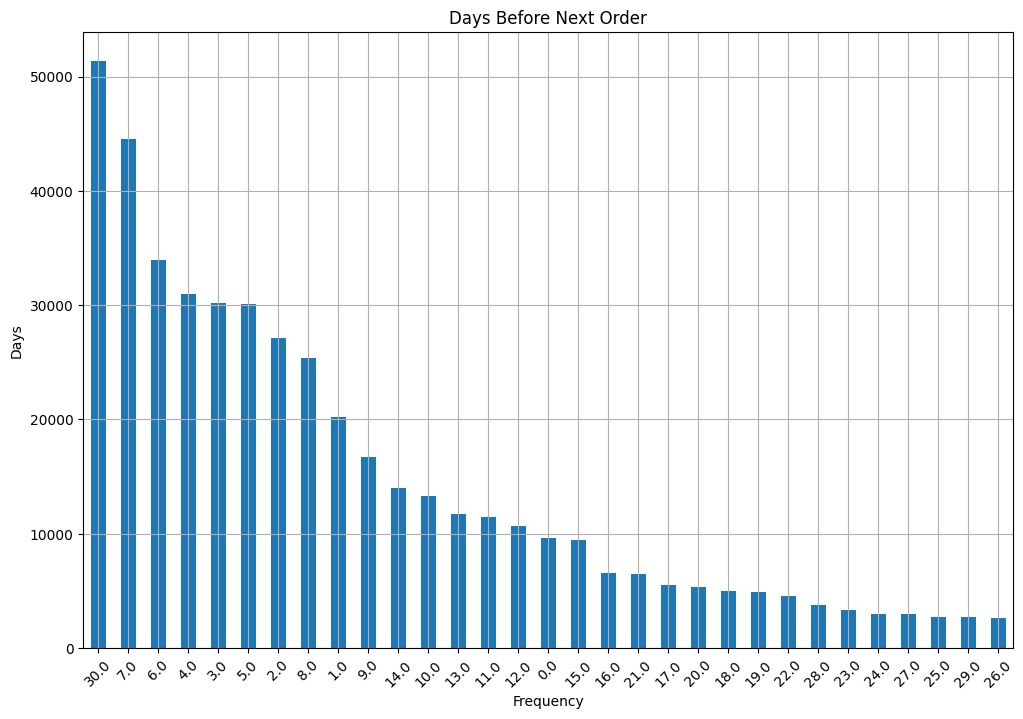

In [70]:
df_instacart_orders['days_since_prior_order'].value_counts(ascending=False).plot(kind='bar',
                                                                                figsize=[12,8],
                                                                                ylabel = 'Frequency',
                                                                                xlabel = "Days",
                                                                                title = "Days Before Next Order",
                                                                                grid = True,
                                                                                rot=45)
plt.xlabel('Frequency')
plt.ylabel('Days')
plt.show()

# Conclusion:

# Most frequent days are 30 days and 7 day for placing the next order. Many customers tend to order weekly or monthly.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [71]:
def histogram_info(data, bin_size=10, minx = None,r=None ):
    '''
    r = rounding for width
    minx = custum min value
    bin_size = bin size
    data = data as a series
    '''
    print('will return bins,midpoints, and labels for intervals')
    
    # find min and max
    if minx == None:
        minx = min(data)
    else:
        pass
    maxy = max(data)
    n = len(data)
    width = np.ceil( (maxy - minx) / bin_size)
    if r == None:
        pass
    else:
        width = round( (maxy - minx) / bin_size,r)
    bins = [i for i in np.arange(minx,maxy+1,width)]
    
    while max(bins) < maxy:
        bins.append(max(bins)+width)
        
    midpoints = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    labels = [ f"[{bins[i]},{bins[i+1]})" for i in range(len(bins)-1)]
    labels[-1] = labels[-1][:-1] + "]"
    

    print(f'size:{n}')
    print(f'min:{minx}')
    print(f'max:{maxy}')
    print(f'bin size:{bin_size}')
    print(f'width:{width}')
    return bins,midpoints,labels    

In [72]:
# distrubtion for saturday
saturdays = df_instacart_orders.query("day_of_week=='saturday'")['order_hour_of_day']
# distrubtion for wednesday
wednesdays = df_instacart_orders.query("day_of_week=='wednesday'")['order_hour_of_day']

In [73]:
bins,midpoints,labels =histogram_info(saturdays)
labels = [i.replace('.0','') for i in labels] # remove decimals

will return bins,midpoints, and labels for intervals
size:62649
min:0
max:23
bin size:10
width:3.0


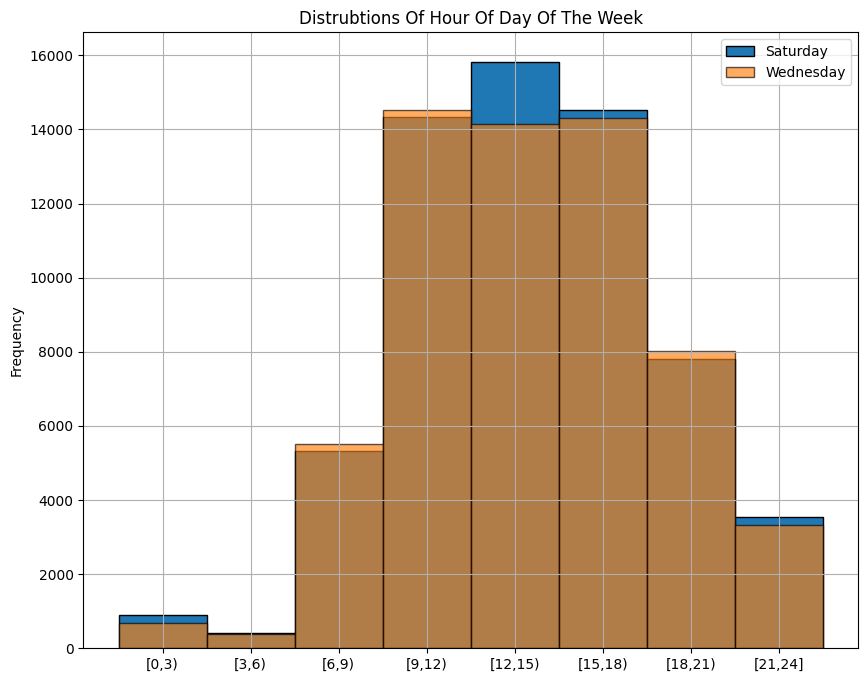

In [74]:
saturdays.plot(kind="hist",
               grid=True,
               xlabel='Hour Of Day',
               title='Distrubtions Of Hour Of Day Of The Week',
               figsize=[10,8],
               edgecolor='black',
               bins = bins)
plt.xticks(midpoints,labels)

wednesdays.plot(kind="hist",
                alpha=0.65,
                edgecolor='black',
                bins = bins)

plt.legend(['Saturday','Wednesday'])
plt.grid(True)
plt.show()

# Conclustion:

# The distributions of the order hours on Wednesday and Saturday appear similar overall, but there is a  difference between 12:00 and 15:00. During this time, Saturday shows a higher frequency of orders compared to Wednesday. This indicates that more people prefer shopping during these hours on Saturdays.


### [B2] What's the distribution for the number of orders per customer?

In [75]:
bins,midpoints,labels = histogram_info(df_instacart_orders.groupby('user_id')['order_number'].max(),bin_size=10)
labels = [i.replace('.0','') for i in labels] # remove decimals

will return bins,midpoints, and labels for intervals
size:157437
min:1
max:100
bin size:10
width:10.0


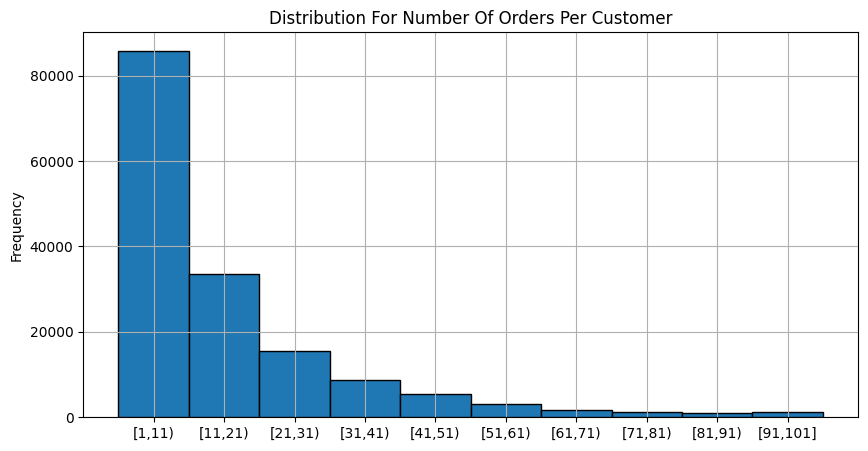

In [76]:
df_instacart_orders.groupby('user_id')['order_number'].max().plot(kind='hist',
                                                                  edgecolor='black',
                                                                 figsize = [10,5],
                                                                 title='Distribution For Number Of Orders Per Customer',
                                                                 xlabel = 'Number Of Orders',
                                                                  grid = True,
                                                                  bins=bins)


plt.xticks(midpoints,labels)
plt.show()

# Conclusion:

# The distribution of the number of orders per customer shows that most customers place between 1 and 10 orders, with the frequency declining as the number of orders increases. This indicates that a huge portion of Instacart’s customer base consists of low frequency shoppers, while high frequency shoppers are relatively rare.

### [B3] What are the top 20 popular products (display their id and name)?

In [77]:
df_products.head()

,product_id,product_name,aisle_id,department_id,product_name_lower,product_name_lower_2
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,chocolatesandwichcookies
1,2,All-Seasons Salt,104,13,all-seasons salt,allseasonssalt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea,robustgoldenunsweetenedoolongtea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...,smartonesclassicfavoritesminirigatoniwithvodka...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce,greenchileanytimesauce


In [78]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [79]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [80]:
df_merge1 = df_instacart_orders.merge(df_order_products,on='order_id',how='inner')
df_merge1.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,saturday,19048,1,1
1,1515936,183418,11,6,13,30.0,saturday,47766,3,1
2,1515936,183418,11,6,13,30.0,saturday,45066,9,0
3,1515936,183418,11,6,13,30.0,saturday,24082,11,0
4,1515936,183418,11,6,13,30.0,saturday,24363,4,0


In [81]:
df_merge2 = df_merge1.merge(df_products,on='product_id',how='inner')
cols = ['order_id','user_id','product_name','product_id']
df_clean = df_merge2[cols]
df_clean.head()

,order_id,user_id,product_name,product_id
0,1515936,183418,Organic Butternut Squash,19048
1,787445,25685,Organic Butternut Squash,19048
2,1646929,205815,Organic Butternut Squash,19048
3,276490,1004,Organic Butternut Squash,19048
4,1300214,33481,Organic Butternut Squash,19048


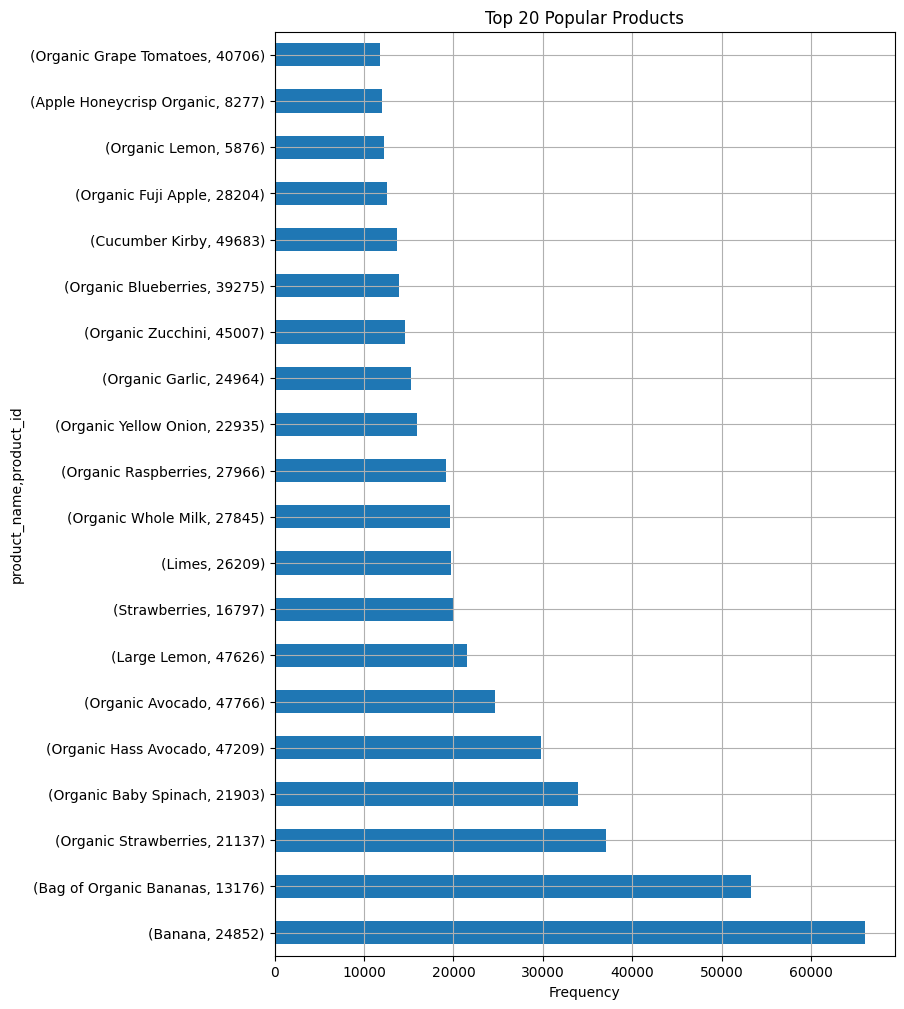

In [82]:
df_clean_grouped = df_clean.groupby(['product_name','product_id']).agg(freq=('user_id','count')).sort_values(by='freq',ascending=False)
df_clean_grouped.head(20).plot(kind='barh',
                               figsize=[8,12],
                               grid=True,
                               ylabel ='Product Name & ID',
                               title = 'Top 20 Popular Products',
                               legend = False)

plt.xlabel('Frequency')
plt.show()

# Conclusion:

# The most frequently purchased products include a mix of organic fruits, vegetables, and other products. Bananas and bags of organic bananas are the top items, with much higher frequencies compared to the rest. Other highly popular items include organic strawberries, organic baby spinach, organic avocados, and limes. This distribution highlights a preference for organic and fresh produce among customers. Retailers can focus on stocking these items to meet consumers demand.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [83]:
df_clean = df_order_products.groupby('order_id').agg(freq=('product_id','count'))
df_clean.head()

,freq
order_id,
4,13
9,15
11,5
19,3
20,8


In [84]:
bins,midpoints,labels = histogram_info(df_clean['freq'],bin_size=20)
labels = [i.replace('.0','') for i in labels] # remove decimals

will return bins,midpoints, and labels for intervals
size:450046
min:1
max:127
bin size:20
width:7.0


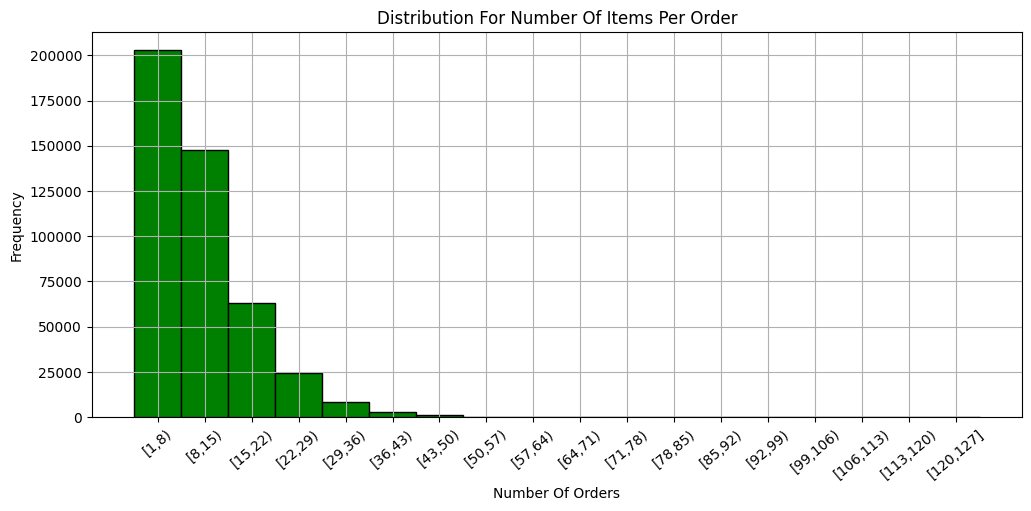

In [86]:
df_clean['freq'].plot(kind='hist',
                      edgecolor='black',
                      figsize = [12,5],
                      title='Distribution For Number Of Items Per Order',
                      xlabel = 'Number Of Orders',
                      grid = True,
                      bins=bins,
                      color='green',
                      rot=40)

plt.xticks(midpoints,labels)
plt.xlabel('Number Of Orders')
plt.show()

The distribution for number of items per order is highly skewd to the left. The majority of customers make purchase between 1 to 13 items per order.

# Conclusion:

# The distribution of items per order is highly skewed to the right, with most orders between 1 to 14 items. The frequency greatly decreases as the number of items in an order increases. This indicates that customers tend to make smaller and more frequent purchases rather than placing large orders. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [91]:
df_reordered = df_order_products.query("reordered ==1")
df_reordered.head()

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1


In [92]:
# Indices of the top 20  most reordered items in order
index_top20 = list(df_reordered['product_id'].value_counts(ascending = False).head(20).index)

In [93]:
cols = ['product_name','product_id']
# make sure its in order
top20 = df_products.query("product_id in @index_top20")[cols].set_index("product_id").loc[index_top20].reset_index()
print('Top 20 items that are reordered most frequently ')
top20

Top 20 items that are reordered most frequently 


,product_id,product_name
0,24852,Banana
1,13176,Bag of Organic Bananas
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,47209,Organic Hass Avocado
5,47766,Organic Avocado
6,27845,Organic Whole Milk
7,47626,Large Lemon
8,27966,Organic Raspberries
9,16797,Strawberries


# Conclusion:
# The top 20 most frequently reordered items include organic and fresh produce, like  bananas, organic strawberries, organic avocados, and organic baby spinach. This suggests that customers frequently reorder healthy food items.

### [C3] For each product, what proportion of its orders are reorders?

In [98]:
proportion_product_reorder = df_order_products.groupby('product_id').agg(proportion_product_reorders = ('reordered','mean'))*100
proportion_product_reorder.head()

,proportion_product_reorders
product_id,
1,56.428571
2,0.000000
3,73.809524
4,51.020408
7,50.000000


In [99]:
# Merge the products df with the new proportion df to get the names and 
proportion_product_reorder = proportion_product_reorder.merge(df_products,how="inner",on="product_id")

# Get the most important columns 
cols = ['product_id','product_name','proportion_product_reorders']
proportion_product_reorder = proportion_product_reorder[cols]
proportion_product_reorder.head()

,product_id,product_name,proportion_product_reorders
0,1,Chocolate Sandwich Cookies,56.428571
1,2,All-Seasons Salt,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,73.809524
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,51.020408
4,7,Pure Coconut Water With Orange,50.000000


In [100]:
# clean the proportion_product_reorders column
proportion_product_reorder['proportion_product_reorders'] = proportion_product_reorder['proportion_product_reorders'].apply(lambda x: str(round(x,2))+"%" )
proportion_product_reorder.sort_values(by='proportion_product_reorders',ascending=False).head(10)

,product_id,product_name,proportion_product_reorders
9338,10236,Fragrance Free Clay with Natural Odor Eliminat...,95.24%
5002,5470,Tequila Reposado,94.74%
8092,8867,Artisan Multigrain Bread,94.44%
19039,20783,Super Detox Acai Noni Goji,94.44%
24813,27041,Mushroom Stems & Pieces,93.75%
20210,22049,Organic Blue Corn Tortila Chips,93.33%
7687,8428,Fresh Squeezed IPA,93.33%
12085,13240,Licorice- Twists- Black,92.86%
41722,45523,Dark 83% Pure Dark Chocolate Bite,92.86%
14425,15783,Smoked 5 Spice Tofu,92.31%


In [101]:
proportion_product_reorder.sort_values(by='proportion_product_reorders',ascending=False).tail(10)

,product_id,product_name,proportion_product_reorders
37791,41244,XXXtra Hot Chile Habanero Sauce,0.0%
37803,41256,Grape Super Drink,0.0%
19867,21672,For Supplementation with Iron Powder Infant Fo...,0.0%
30149,32881,Non-Alcoholic Malt Beverage,0.0%
9981,10938,Flour Grande Tortillas,0.0%
37798,41251,Plant Protein Almond Butter,0.0%
19872,21677,Baby Powder,0.0%
9975,10931,Whole Wheat Ramen Noodles,0.0%
9974,10930,IB Pain Reliever/Fever Reducer Liquid Gels,0.0%
25622,27917,Multi-Surface Floor Cleaner Citrus Essence,0.0%


# Conclusion:

# The analysis shows the proportion of orders that are reorders for each product. The products with the highest reorder proportions like Fragrance Free Clay with Natural Odor Eliminator (95.24%) and Tequila Reposado (94.74%).However, products like XXXtra Hot Chile Habanero Sauce and Grape Super Drink, with 0% reorder rates indicate a lack of repeat demand.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [107]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [108]:
df_instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,1515936,183418,11,6,13,30.0,saturday
1,1690866,163593,5,5,12,9.0,friday
2,1454967,39980,4,5,19,2.0,friday
3,1768857,82516,56,0,20,10.0,sunday
4,3007858,196724,2,4,12,17.0,thursday


In [109]:
df_merge = df_order_products.merge(df_instacart_orders,on="order_id",how="inner")
df_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,day_of_week
0,2141543,11440,17,0,58454,25,0,15,8.0,sunday
1,2141543,31869,15,1,58454,25,0,15,8.0,sunday
2,2141543,30233,9,1,58454,25,0,15,8.0,sunday
3,2141543,27966,20,1,58454,25,0,15,8.0,sunday
4,2141543,13176,2,1,58454,25,0,15,8.0,sunday


In [110]:
proportion_users_reorder = df_merge.groupby('user_id').agg(proportion_user_reorders = ('reordered','mean'))*100
proportion_users_reorder.head()

,proportion_user_reorders
user_id,
2,3.846154
4,0.000000
5,66.666667
6,0.000000
7,92.857143


In [111]:
# clean the proportion user reorders col
proportion_users_reorder['proportion_user_reorders'] = proportion_users_reorder['proportion_user_reorders'].apply(lambda x: str(round(x,2))+"%")
proportion_users_reorder.sort_values(by='proportion_user_reorders').head(10)

,proportion_user_reorders
user_id,
103176,0.0%
150574,0.0%
150587,0.0%
24793,0.0%
150588,0.0%
87294,0.0%
87288,0.0%
24783,0.0%
150606,0.0%


In [112]:
proportion_users_reorder.sort_values(by='proportion_user_reorders').tail(10)

,proportion_user_reorders
user_id,
82679,98.7%
177643,98.72%
26308,98.72%
11839,98.73%
142654,98.85%
113113,98.88%
4368,98.91%
5588,99.07%
196748,99.14%


In [114]:
proportion_users_reorder = df_merge.groupby('user_id').agg(proportion_user_reorders = ('reordered','mean'))*100
proportion_users_reorder['proportion_user_reorders'] = proportion_users_reorder['proportion_user_reorders'].apply(lambda x: round(x,2))
proportion_users_reorder.head()

,proportion_user_reorders
user_id,
2,3.85
4,0.00
5,66.67
6,0.00
7,92.86


In [127]:
bins,midpoints,labels = histogram_info(proportion_users_reorder['proportion_user_reorders'],bin_size=15)

will return bins,midpoints, and labels for intervals
size:149626
min:0.0
max:100.0
bin size:15
width:7.0


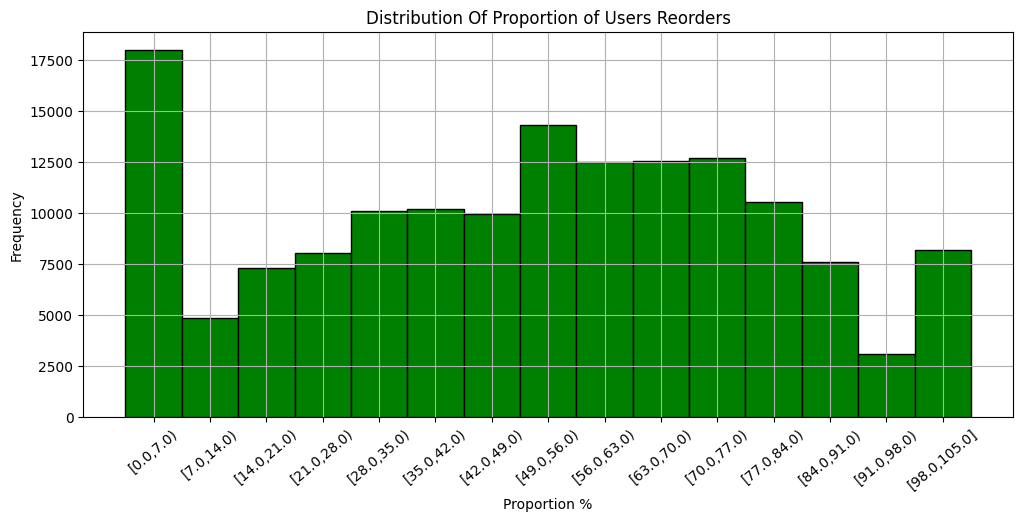

In [128]:
proportion_users_reorder['proportion_user_reorders'].plot(kind='hist',
                                                          edgecolor='black',
                                                          figsize = [12,5],
                                                          title='Distribution Of Proportion of Users Reorders',
                                                          xlabel = 'Number Of Orders',
                                                          grid = True,
                                                          bins=bins,
                                                          color='green',
                                                          rot=40)

plt.xticks(midpoints,labels)
plt.xlabel('Proportion %')
plt.show()

# Conclusion

# The histogram of the proportion of reordered products for each customer shows a diverse range of reorder behaviors. The distribution appears multimodal, with a large number of customers having very low reorder percentages (close to 0-6%), a peak at the 49-55%, and another peak at high reorder percentages (above 98%). 

### [C5] What are the top 20 items that people put in their carts first? 

In [129]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [130]:
df_products.head()

,product_id,product_name,aisle_id,department_id,product_name_lower,product_name_lower_2
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,chocolatesandwichcookies
1,2,All-Seasons Salt,104,13,all-seasons salt,allseasonssalt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea,robustgoldenunsweetenedoolongtea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...,smartonesclassicfavoritesminirigatoniwithvodka...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce,greenchileanytimesauce


In [131]:
# Filter only products that are 1st
df_first = df_order_products.query("add_to_cart_order==1")

top20_1st_products = df_first['product_id'].value_counts().head(20).reset_index().rename(columns = {'index':'product_id','product_id':'Freq'})
top20_1st_products.head()

,product_id,Freq
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390


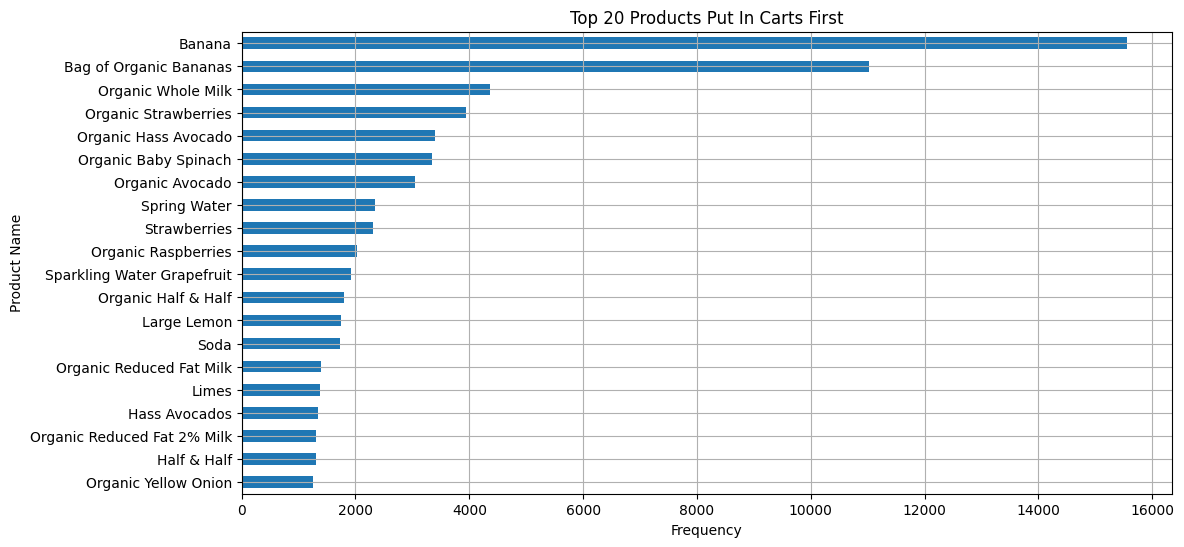

In [132]:
top20_1st_products_merge = top20_1st_products.merge(df_products,on='product_id')[['product_name','Freq']].set_index('product_name').sort_values('Freq')

# Plot
top20_1st_products_merge.plot(kind='barh',
                              xlabel = 'Product Name',
                              ylabel = 'Frequency',
                              title = 'Top 20 Products Put In Carts First',
                              figsize=[12,6],
                              legend=False,
                              grid = True)


plt.xlabel('Frequency')
plt.show()

# Conclusion:

# The analysis of the top 20 products first added to carts shows patterns regarding initial selections in their shopping experience. Bananas rank as the most frequently added item, followed by the "Bag of Organic Bananas" and "Organic Whole Milk." This implies that produce items dominate customers' initial cart choices. Organic products also dominates the list.

# Instacart Dataset Analysis: Key Insights 

## Key Insights

### 1. Popular Items
- **Bananas** are the most frequently purchased and the most commonly added first to shopping carts on Instachart users, showing their importance as a grocery product.
- **Organic products** dominate both the frequently reordered and first added items, showing a strong preference for fresh and organic produce among customers.

### 2. Shopping Patterns
- **Time of Day:** Customers primarily shop between **10 a.m. and 4 p.m.**, with minimal activity during the early morning hours (1 a.m.–6 a.m.).
- **Day of the Week:** Sundays and Mondays are the most popular shopping days.
- **Order Frequency:** Weekly (7 days) and monthly (30 days) orders are the most common.

### 3. Reordering Trends
- Customers show a strong interest to reorder organic fruits and vegetables.

### 4. Order Size Distribution
- The majority of orders contain between **1 and 14 items**, indicating a preference for smaller, more frequent shopping trips rather than bulk purchasing.

### 5. Customer Segmentation
- A **multimodal distribution** in reorder percentages across customers suggests diverse purchasing behaviors. Some customers reorder very frequently (above 98%), while others rarely reorder.

---

## Recommendations

### 1. Stocking and Inventory
- Focus on showing the availability of high demand organic produce like bananas, spinach, and avocados.

### 2. Optimized Delivery Slots
- Make delivery options with peak shopping hours (**10 a.m.–4 p.m.**) and popular days (**Sunday and Monday**) to increase customer satisfaction.

### 3. Customer 
- Tailor loyalty programs for high frequency customers.
- Better advitising to convert low frequency shoppers into regular customers.

---